# Prediksi Tulang Belakang Normal, Disk Hernia, atau Spondylolisthesis

# Pendahuluan

Permasalahan kelainan tulang belakang merupakan salah satu gangguan kesehatan yang sering terjadi pada masyarakat, terutama akibat faktor usia, postur tubuh yang buruk, maupun beban kerja fisik yang berlebihan. Dua jenis kelainan yang umum ditemukan adalah disk hernia dan spondylolisthesis, yang dapat menyebabkan rasa nyeri, keterbatasan gerak, dan penurunan kualitas hidup. Deteksi dini terhadap kelainan-kelainan tersebut sangat penting agar penanganan medis dapat dilakukan secepat mungkin.

Dengan berkembangnya teknologi, khususnya di bidang kecerdasan buatan. proses klasifikasi atau diagnosis kelainan tulang belakang kini dapat dibantu oleh sistem cerdas berbasis data.



# Data Understanding

## Sumber Data

Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/212/vertebral+column

Salah satu dataset yang umum digunakan dalam pengembangan dan penelitian klasifikasi medis adalah Vertebral Column Dataset yang tersedia di UCI Machine Learning Repository. Dataset ini memuat parameter biomekanis yang diambil dari citra radiografi tulang belakang pasien, seperti pelvic incidence, sacral slope, dan lumbar lordosis angle.

## Tujuan

Penelitian ini bertujuan untuk mengimplementasikan algoritma klasifikasi dalam mengelompokkan kondisi tulang belakang pasien ke dalam tiga kategori, yaitu: normal, hernia diskus, dan spondylolisthesis. Dengan memanfaatkan teknik pembelajaran mesin, diharapkan sistem ini mampu menjadi alat bantu diagnosis awal yang efisien, akurat, dan bermanfaat dalam bidang medis, khususnya ortopedi.

## Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

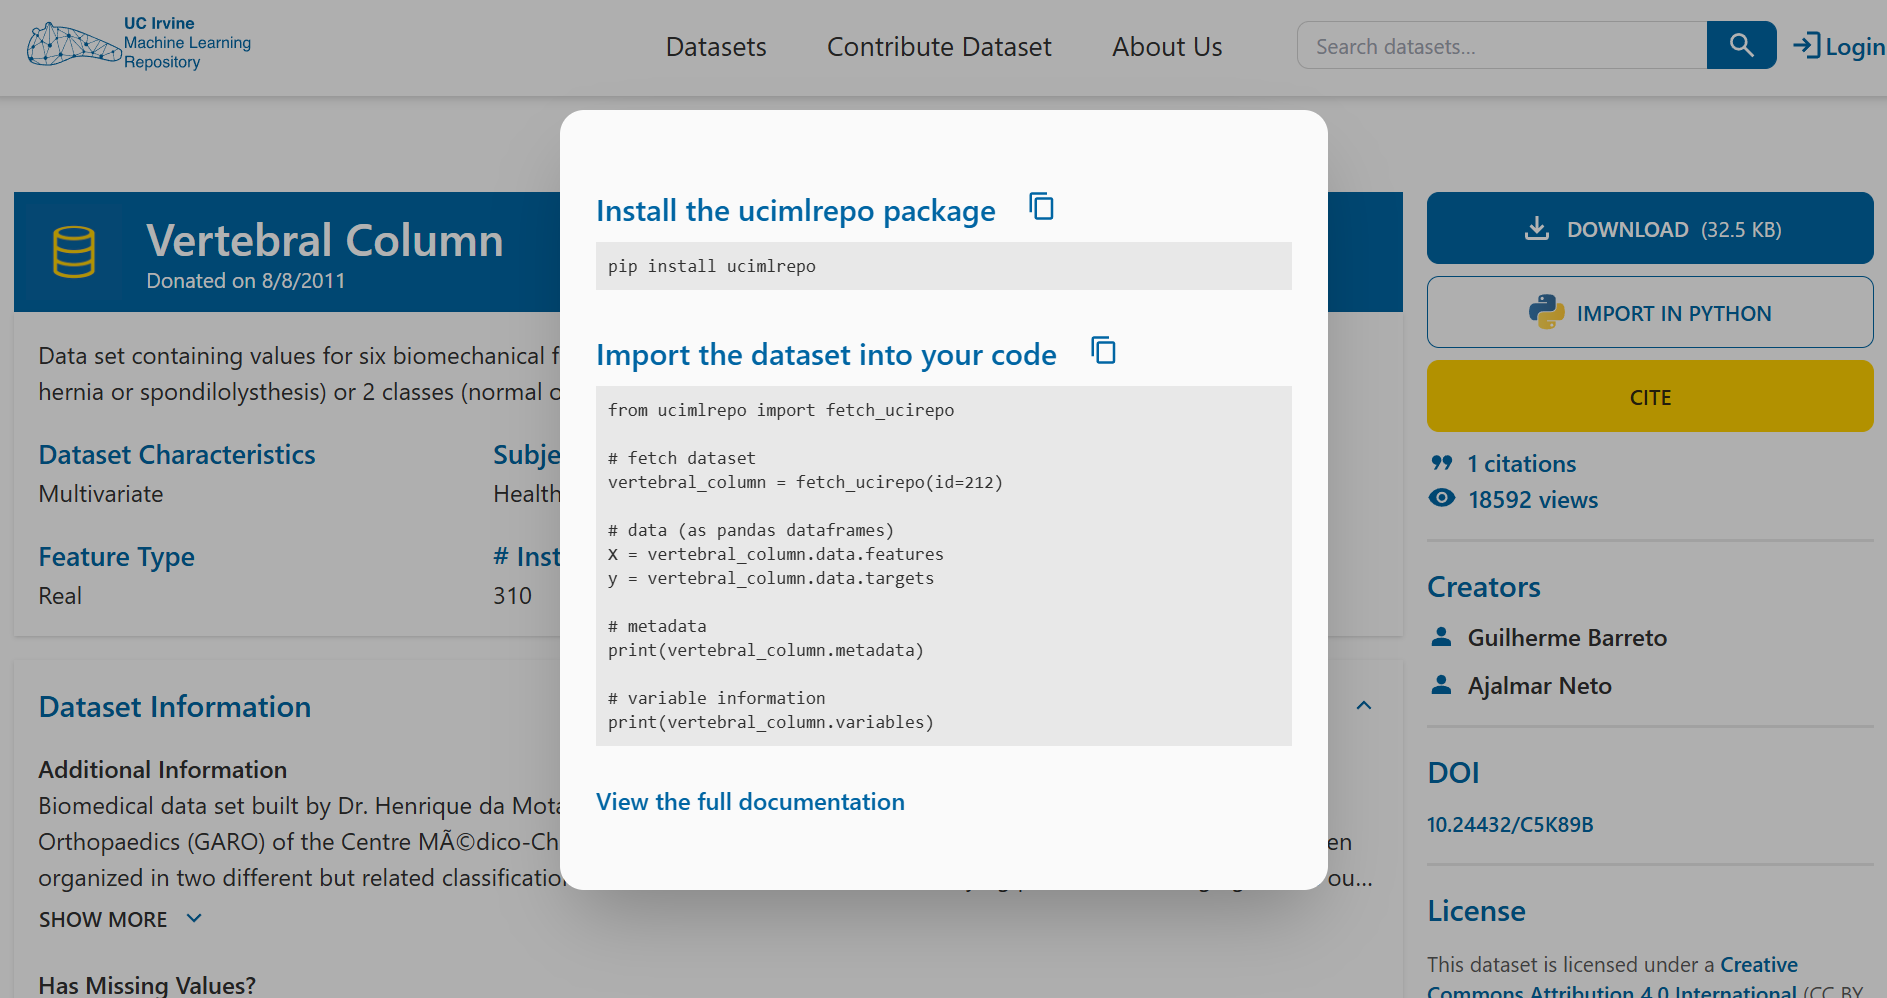

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
vertebral_column = fetch_ucirepo(id=212)

# data (as pandas dataframes)
X = vertebral_column.data.features
y = vertebral_column.data.targets

data = vertebral_column.data.original

data.to_csv("vertebral_column.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.31

## Eksplorasi Data

### VIsualisasi Data

In [4]:
display(data) #display dataset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


#### Tampilkan banyaknya class

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Ambil dataset
vertebral_column = fetch_ucirepo(id=212)

# Gabungkan fitur dan target
X = vertebral_column.data.features
y = vertebral_column.data.targets
data = pd.concat([X, y], axis=1)


/tmp/ipython-input-6-468467621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='class', palette='Set2')


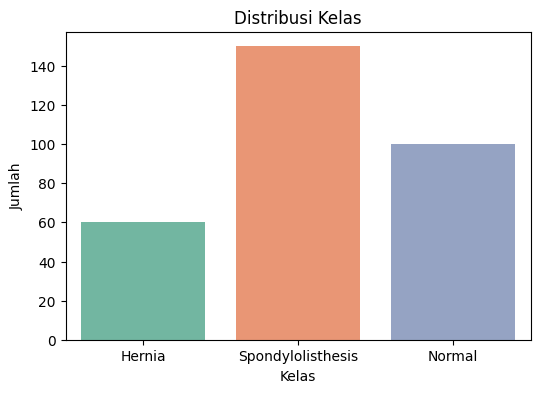

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class', palette='Set2')
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


## Struktur Dataset

### Fitur dan Tabel

In [7]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(310, 7)

Terdapat 310 baris dan 7 kolom.

In [8]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

Fitur adalah atribut atau variabel independen dalam dataset yang digunakan untuk membuat prediksi.

Terdapat 6 fitur pada dataset ini:

*   pelvic_incidence:  Sudut antara garis tegak lurus terhadap sakrum dan garis yang menghubungkan pusat kepala femur. (Nilai numerik dalam derajat (°))

*   pelvic_tilt: Mengukur kemiringan panggul terhadap garis vertikal. Ini mencerminkan posisi panggul terhadap postur tubuh. (Nilai derajat kemiringa)

*   lumbar_lordosis_angle: udut kelengkungan tulang belakang bagian bawah (lumbar). (Nilai numerik dalam derajat)

*   sacral_slope: Sudut kemiringan sakrum terhadap horizontal. Ini berbanding langsung dengan pelvic incidence. (Nilai numerik deraja)

*   pelvic_radius: Jarak antara pusat sakrum dan kepala femur. Merupakan parameter ukuran anatomi panggul. (Nilai panjang (kemungkinan satuannya mm atau cm))

*   degree_spondylolisthesis: Derajat pergeseran atau “slip” tulang belakang ke depan terhadap ruas bawahnya. (Nilai real/float yang bisa positif atau negatif)

Label adalah variabel dependen atau target yang ingin diprediksi oleh model machine learning. Label merupakan output yang dipelajari oleh model dari data.

Terdapat 1 field label dengan 3 tipe pada dataset ini:

*   Normal

*   Disk Hernia

*   spondylolisthesis

In [9]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

,0
pelvic_incidence,float64
pelvic_tilt,float64
lumbar_lordosis_angle,float64
sacral_slope,float64
pelvic_radius,float64
degree_spondylolisthesis,float64
class,object


## Identifikasi Kualitas Dataset

### Deteksi Missing Value

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

* Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.

* Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.

* Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

* Mengabaikan dan membuang missing data.

* Estimasi parameter.

* Imputasi.

pada kolom di bawah ini akan dilakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.

In [10]:
# Cek apakah ada missing value di setiap kolom
missing_values = data.isnull().sum()

# Tampilkan hasilnya
print("Jumlah Missing Value per Kolom:\n")
print(missing_values)

# (Opsional) Tampilkan kolom mana saja yang punya missing value
print("\nKolom dengan missing value:")
print(missing_values[missing_values > 0])


Jumlah Missing Value per Kolom:

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

Kolom dengan missing value:
Series([], dtype: int64)


Didapatkan missing value 0 pada setiap fitur

# Prepocessing Data

Preprocessing dilakukan untuk:

* Menghindari bias algoritma akibat skala fitur

* Meningkatkan akurasi model

* Memastikan data bersih dan siap digunakan

### Normalisasi

* Karena penelitian ini akan menggunakan KNN maka perlu normalisasi karean algoritma ini sensitif terhadap jarak antar fitur

* Naive Bayes dan Decision Tree sebenarnya tidak terlalu bergantung pada skala, namun tetap direkomendasikan untuk menjaga konsistensi.

In [11]:
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur (tanpa label)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame (jika ingin melihat)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


### Deteksi dan Penanganan Outlier

Outlier/pencilan merupakan data pada dataset yang menyimpang dari data lainnya,mendeteksi outlier perlu agar data yang diolah memberikan hasil yang baik pada model yang akan dibuat nantinya. Outlier dapat diidentifikasi dan ditangani dengan beberapa cara antara lain yang akan kami gunakan yaitu LOF(Local Outlier Factor).

#### Konsep Local Outlier Factor

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier. LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.

Untuk memahami LOF, ada beberapa konsep yang harus dipelajari secara berurutan:

* K-distance dan K-neighbors

* Reachability Distance (RD)

* Local Reachability Density (LRD)

* Local Outlier Factor (LOF)

K-distance & K-neighbors

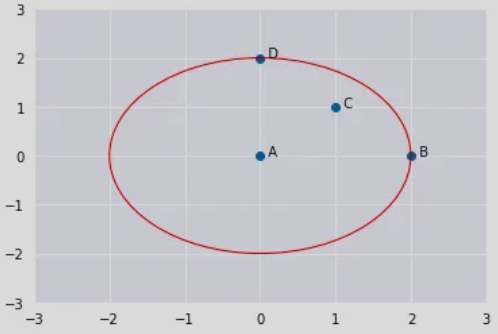

K-distance adalah jarak antara suatu titik, dan merupakan tetangga terdekat Kᵗʰ. Tetangga K yang dilambangkan dengan Nₖ(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K. Kita akan melihat contohnya. Katakanlah kita mempunyai empat titik A, B, C, dan D. Jika K=2, K-tetangga A adalah C, B, dan D. Di sini, nilai K=2 tetapi ||N₂(A)|| = 3. Oleh karena itu, ||Nₖ(titik)|| akan selalu lebih besar atau sama dengan K.

Reachability Distance (RD)

didefinisikan sebagai jarak K maksimum Xj dan jarak antara Xi dan Xj. Ukuran jarak bersifat khusus untuk masalah (Euclidean, Manhattan, dll.) Dalam istilah awam, jika titik Xi terletak di dalam K-tetangga Xj, maka jarak jangkauannya adalah K-jarak Xj (garis biru), jika tidak, jarak jangkauannya adalah jarak antara Xi dan Xj (garis oranye).

Local reachability density (LRD)
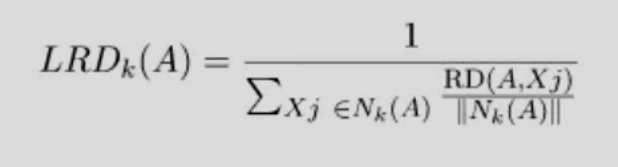

LRD merupakan kebalikan dari rata-rata jarak jangkauan A dari tetangganya. Semakin besar jarak jangkauan rata-rata (yaitu, tetangga jauh dari titik tersebut), semakin sedikit kepadatan titik yang ada di sekitar titik tertentu. Ini menunjukkan seberapa jauh suatu titik dari kelompok titik terdekat. Nilai LRD yang rendah menunjukkan bahwa cluster terdekat berada jauh dari titik.

Local Outlier Factor (LOF)

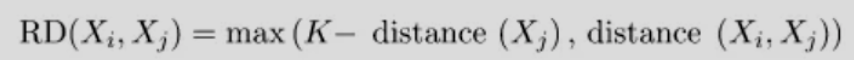

LRD tiap titik digunakan untuk membandingkan dengan rata-rata LRD K tetangganya. LOF adalah perbandingan rata-rata LRD K tetangga A terhadap LRD A. Jika suatu titik bukan merupakan pencilan (inlier), rasio rata-rata LRD tetangganya kira-kira sama dengan LRD suatu titik (karena kepadatan suatu titik dan tetangganya kira-kira sama). Dalam hal ini, LOF hampir sama dengan 1. Sebaliknya, jika suatu titik merupakan outlier, LRD suatu titik lebih kecil dari rata-rata LRD tetangganya. Maka nilai LOF akan tinggi. Umumnya jika LOF > 1 maka dianggap outlier, namun hal tersebut tidak selalu benar. Katakanlah kita mengetahui bahwa kita hanya memiliki satu outlier dalam data, lalu kita ambil nilai LOF maksimum di antara semua nilai LOF, dan titik yang sesuai dengan nilai LOF maksimum akan dianggap sebagai outlier.

Untuk langkah-langkah perhitungan manual Local Outlier Factor (LOF) yaitu :

1. Menghitung jarak dan menentukan tetangga

2. Menghitung Reachability Distance (RD)

3. Menghitung Local Reachability Distance (LRD)

4. Menghitung Local Outlier Factor (LOF)

#### Implementasi Local Outlier Factor dengan Scikit Learn

In [12]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan data tersedia dan label terakhir dihapus
data1 = data.drop(columns=['class'])  # Buang label untuk analisis outlier

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=9, contamination=0.03)

# Menyimpan indeks outlier dalam list
outlier_indices = []

# Melakukan deteksi outlier untuk setiap fitur secara terpisah
for column in data1.columns:
    feature_values = data1[column].values.reshape(-1, 1)
    y_pred = lof.fit_predict(feature_values)

    # Tambahkan indeks yang dideteksi sebagai outlier (label -1)
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Menghilangkan duplikat indeks
outlier_indices = list(set(outlier_indices))

# Menampilkan informasi outlier
print("===================================== OUTLIER =====================================")
for i in outlier_indices:
    print(f"Outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# Menyusun indeks baris yang mengandung outlier (tanpa duplikat)
outlier_row_indices = sorted(set([i[0] for i in outlier_indices]))

# Tampilkan baris yang mengandung outlier
outlier_data = data.iloc[outlier_row_indices]

print("===================================== DATA =====================================")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)




===================================== OUTLIER =====================================
Outlier ditemukan pada baris => 85, kolom => pelvic_radius
Outlier ditemukan pada baris => 173, kolom => pelvic_radius
Outlier ditemukan pada baris => 39, kolom => pelvic_incidence
Outlier ditemukan pada baris => 49, kolom => lumbar_lordosis_angle
Outlier ditemukan pada baris => 40, kolom => lumbar_lordosis_angle
Outlier ditemukan pada baris => 26, kolom => degree_spondylolisthesis
Outlier ditemukan pada baris => 112, kolom => pelvic_tilt
Outlier ditemukan pada baris => 26, kolom => pelvic_incidence
Outlier ditemukan pada baris => 257, kolom => pelvic_tilt
Outlier ditemukan pada baris => 115, kolom => sacral_slope
Outlier ditemukan pada baris => 235, kolom => degree_spondylolisthesis
Outlier ditemukan pada baris => 147, kolom => pelvic_tilt
Outlier ditemukan pada baris => 94, kolom => pelvic_incidence
Outlier ditemukan pada baris => 96, kolom => pelvic_incidence
Outlier ditemukan pada baris => 162, kolo

##### Visualisasi

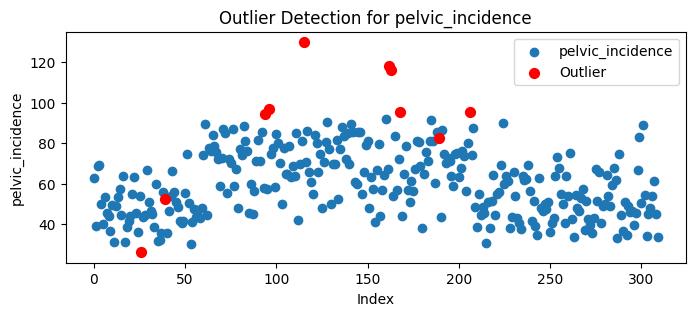

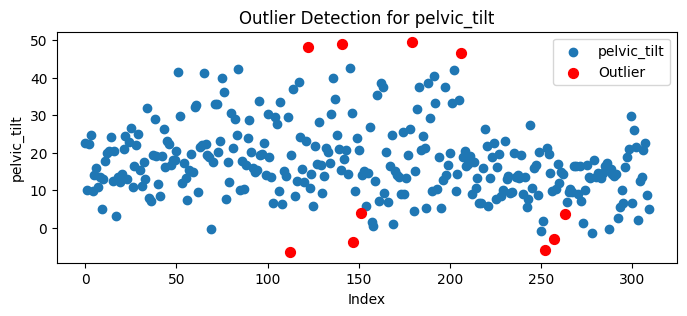

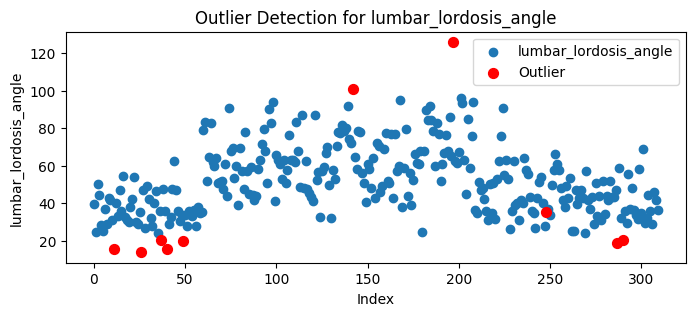

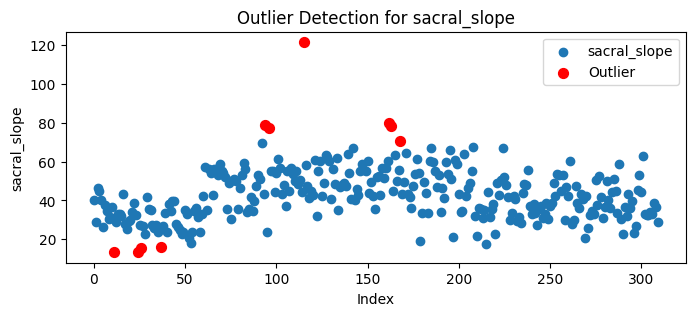

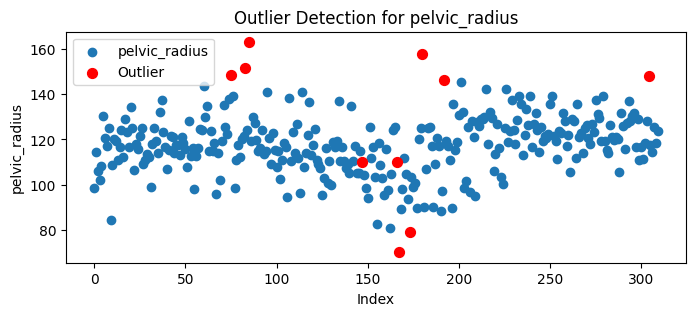

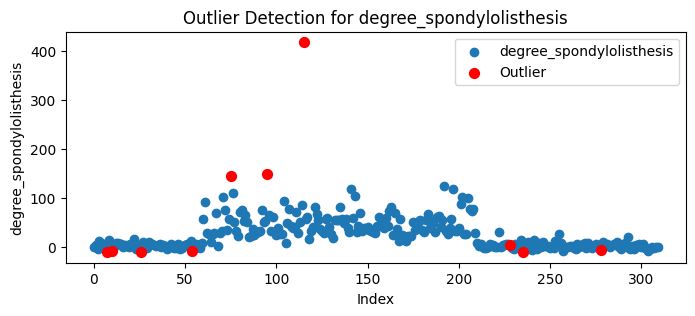

In [13]:
# Visualisasi outlier per fitur (jika ingin diaktifkan)
for col in data1.columns:
    plt.figure(figsize=(8, 3))
    plt.scatter(range(len(data1[col])), data1[col], label=col)
    plt.scatter(
        [i[0] for i in outlier_indices if i[1] == col],
        data1[col].iloc[[i[0] for i in outlier_indices if i[1] == col]],
        color='red', label="Outlier", s=50
    )
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.title(f"Outlier Detection for {col}")
    plt.legend()
    plt.show()

untuk penanganan outlier tidak kita lakukan dikarenakan data yang terindikasi outlier masih berada di rentang yang normal(tidak melebihi interval) dan Distribusi outlier menyebar di semua kelas dan Beberapa nilai negatif pada fitur tertentu

# Klasifikasi





## Modelling Klasifikasi Gaussian Naive Bayes

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.Untuk modelling kali ini bertujuan untuk menentukan class pada suatu data inputan .Data akan dibagi menjadi 2 tipe yaitu data test dan data train dan pemodelan kali ini menggunakan metode Gaussian Naive Bayes.

Pada bagian ini akan ditentukan severity dari data yang akan saya inputan apakah termasuk jinak atau ganas.

cara kalkulasi GNB dapat melalui tahap berikut:

1. Bagi Dataset menjadi data test dan data train

ada dua jenis pembagian rasio dataset yang sering digunakan yaitu:

* 80% data train dan 20% data test.

* 70% data train dan 30% data test.

Untuk kali ini kita akan menggunkan raiso 80% data train dan 20% data test,namun kalian bisa mengubahnya tergantung situasi dan kondisi dilapangan nantinya.

2. Mengghitung Probabilitas pada data train setiap sheet

lakukan perhitungan probabilitas dari masing-masing kelas sesuai dengan jumlah data train pada kelas tersebut kemudian dibagi dengan banyaknya total data train.

ini digunakan untuk menghitung Prior

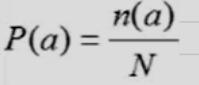

3. Menghitung Mean dan Standart dev

hitung mean dan standart deviasi setiap fitur pada setiap kelas di data train kita

4. menghitung Distribusi gaussian

lakukan perhitungan dengan rumus distribusi gaussian dengan rumus sebagai berikut:

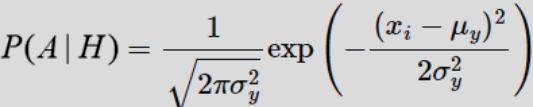

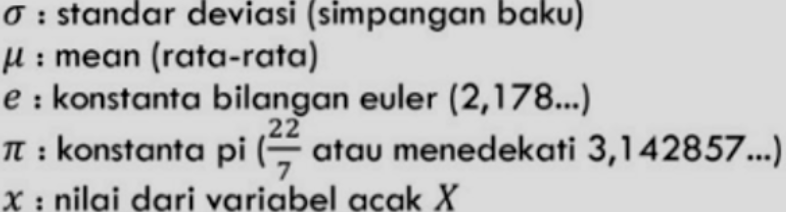

5. hitung posterior

Setelah didapat semua hasil dari distribusi gaussian, langkah selanjutnya adalah menentukan posteriori-nya. Berikut ini untuk rumusnya:

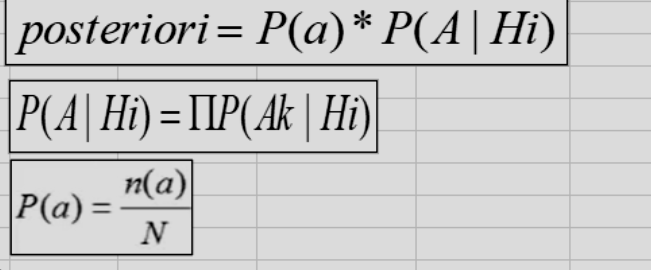

P(A|Hi) : hasil perkalian setiap fitur pada setiap kelas

P(a) : probabilitas setiap kelas

posteriori = P(A|Hi) * P(a)

6. tentukan maximum posterior

setelah kita menghitung semua posterior maka dapat kita cari mana yang terbesar

data posterior paling besar tersebut yang merupakan akan menjadi class dari data yang kita inputkan

MODEL

In [14]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Asumsikan data kamu sudah dalam bentuk dataframe "data"
# data = pd.concat([X, y], axis=1) ← sebelumnya sudah dilakukan

# Pisahkan fitur dan label
X = data[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
          'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y = data['class']  # Label kolom

# Encode label jika masih teks
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Buat model Gaussian Naive Bayes
gnb_model = GaussianNB()

# Latih model
gnb_model.fit(X_train, y_train)

# Prediksi
y_pred = gnb_model.predict(X_test)

# Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')  # karena multiclass
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Tampilkan hasil
print("========== HASIL EVALUASI NAIVE BAYES ==========")
print(f"Akurasi       : {acc:.2f}")
print(f"Presisi       : {prec:.2f}")
print(f"Recall        : {rec:.2f}")
print(f"F1-Score      : {f1:.2f}")

y_pred = gnb_model.predict(X_test)

print("=========================== X TRAINING =================================")
print(X_train)
print("=========================== X TESTING =================================")
print(X_test)
print("=========================== Y TESTING =================================")
print(y_test)


========== HASIL EVALUASI NAIVE BAYES ==========
Akurasi       : 0.87
Presisi       : 0.83
Recall        : 0.82
F1-Score      : 0.83
=========================== X TRAINING =================================
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
126         70.676898    21.704402              59.181161     48.972496   
109         68.613001    15.082235              63.014696     53.530766   
247         49.828135    16.736435              28.000000     33.091700   
234         37.731992     9.386298              42.000000     28.345694   
202         76.314028    41.933683              93.284863     34.380345   
..                ...          ...                    ...           ...   
188         85.680950    38.650035              82.680977     47.030914   
71          86.900794    32.928168              47.794347     53.972627   
106         65.013773     9.838262              57.735837     55.175511   
270         51.311771     8.875541          

berikut cara menjadikan data train kita ke dalam bentuk csv.

In [15]:
import pandas as pd

# Concatenate X_train and y_train as new column
train_data = pd.concat([X_train, pd.Series(y_train, name='Severity')], axis=1)

# Save training data to CSV with tab-separated values
train_data.to_csv('Train_mammographic_mass.csv', sep="\t", index=False)

uji coba inputan dengan data test menggunakan model yang kita buat.

In [16]:
# Menampilkan data asli baris ke-231 (baris ke-230 karena index dimulai dari 0)
print("Data yang akan digunakan adalah:")
print(data.iloc[230])  # data adalah DataFrame gabungan X dan y

# Contoh input baru dengan 6 fitur (sesuai struktur data)
# Format: [pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis]
input_data = [[85.0, 20.0, 75.0, 65.0, 120.0, 60.0]]

# Prediksi kelas menggunakan model Gaussian Naive Bayes
predicted_class_index = gnb_model.predict(input_data)[0]
predicted_class_label = le.inverse_transform([predicted_class_index])[0]  # kembalikan ke label teks

print("Hasil prediksi:")
print(f"Data yang diinputkan diprediksi sebagai class = {predicted_class_label}")


Data yang akan digunakan adalah:
pelvic_incidence             65.611802
pelvic_tilt                  23.137919
lumbar_lordosis_angle        62.582179
sacral_slope                 42.473883
pelvic_radius               124.128001
degree_spondylolisthesis     -4.083298
class                           Normal
Name: 230, dtype: object
Hasil prediksi:
Data yang diinputkan diprediksi sebagai class = Spondylolisthesis


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')   # rata-rata presisi semua kelas
recall = recall_score(y_test, y_pred, average='macro')         # rata-rata recall semua kelas
fscore = f1_score(y_test, y_pred, average='macro')             # rata-rata F1 semua kelas

# Menampilkan hasil evaluasi
print("========== EVALUASI MODEL NAIVE BAYES ==========")
print(f'Akurasi : {accuracy:.2f}')
print(f'Presisi : {precision:.2f}')
print(f'Recall  : {recall:.2f}')
print(f'F1-Score: {fscore:.2f}')


========== EVALUASI MODEL NAIVE BAYES ==========
Akurasi : 0.87
Presisi : 0.83
Recall  : 0.82
F1-Score: 0.83


## Modelling Klasifikasi KNN

K-Nearest Neighbors (KNN) merupakan sebuah cara untuk mengklasifikasikan dengan cara melihat sesuatu yang berada di dekatnya. KNN juga disebut dengan Algoritna oembelajar malas. Karena tidak memerlukan pembelajaran terlebih dahulu, dan langsung meyimpan data set dan pada saat klaifikasi melakukan set data. KNN bekerja dengan menggunakan kedekatan dan pemungutan suara mayoritas untuk membuat prediksi atau forecasting. Pada KNN terdapat istilah “k”. “k” merupakan angka yang memberi tahu algoritma beberapa banya titik terdekat (tetangga) yang digunakan untuk membuat keputusan. Contohnya: Misalkan menntukan nama buah dan membandingkannya dengan buah yang telah dikenal. kemudian menggunakan nilai “k” sebanyak 3 kemudian 2 dari 3 merupakan buah apel dan 1 dari 3 merupakan buah pisang. jadi algoritma ini mengatakan bahwa buah tersebut merupakan apel karena sebagian besar tetangganya apel.

### Menentukan Nilai “k”

Dalam KNN, pemilihan nilai “k” sangat penting untuk menentukan hipotesis hasil dari prediksi. Jika kumpulan data memiliki outlier atau noise yang signifikan, nilai “k” yang lebih tinggi dapat membantu memperhalus prediksi dan mengurangi data yang noise. Namun, pemilihan nilai yang tinggi dapat menyebabkan underfitting.

Pertama, kita harus menentukan nilai K terlebih dahulu. Penentuan nilai K ini tidak ada rumus pastinya. Namun satu tips yang dapat dipertimbangkan, yakni jika kelas berjumlah genap maka sebaiknya nilai K-nya ganjil, sebaliknya jika kelas berjumlah ganjil maka sebaiknya nilai K-nya genap. Dalam prakteknya di Python, Anda dapat menghitung menggunakan kode program untuk mencari nilai K terbaik dari berbagai opsi nilai (misalnya dari K=2 sampai K=10).

### Hitung jarak antara data baru dan masing-masing data lainnya

menghitung jarak menggunakan metode Euclidean distance

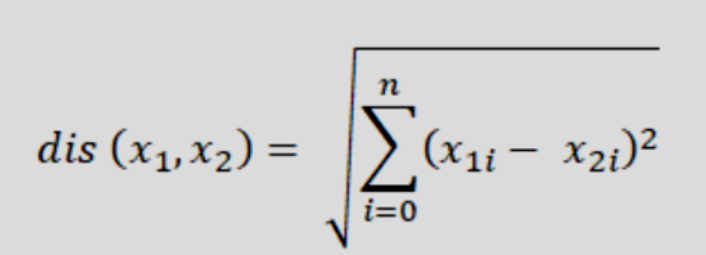

Jika ada lebih dari satu, kita dapat menjumlahkannya seperti di bawah ini.

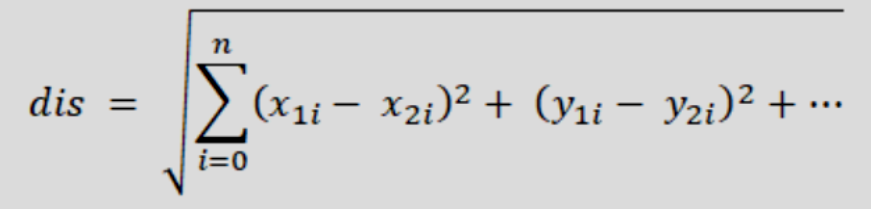

Ambil tiga data dengan jarak terdekat. Dari perhitungan Euclidean distance di atas, jika kita rangkum dari jarak terdekat

### Impelementasi KNN menggunakan Scikit Learn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Gunakan data yang sudah disiapkan sebelumnya:
# X, y_encoded, le → label encoder
# X_train, X_test, y_train, y_test → hasil train_test_split

# Buat model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# Tampilkan hasil
print("========== EVALUASI MODEL KNN ==========")
print(f'Akurasi : {accuracy_knn:.2f}')
print(f'Presisi : {precision_knn:.2f}')
print(f'Recall  : {recall_knn:.2f}')
print(f'F1-Score: {f1_knn:.2f}')

# Optional: Report klasifikasi
print("\n=== Classification Report KNN ===")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


========== EVALUASI MODEL KNN ==========
Akurasi : 0.84
Presisi : 0.78
Recall  : 0.77
F1-Score: 0.77

=== Classification Report KNN ===
                   precision    recall  f1-score   support

           Hernia       0.64      0.58      0.61        12
           Normal       0.72      0.72      0.72        18
Spondylolisthesis       0.97      1.00      0.98        32

         accuracy                           0.84        62
        macro avg       0.78      0.77      0.77        62
     weighted avg       0.83      0.84      0.84        62



## Modelling Klasifikasi Decision Tree

Decision Tree (Pohon Keputusan) adalah algoritma machine learning yang membangun model prediksi dalam bentuk struktur pohon. Algoritma ini memecah dataset menjadi himpunan data yang lebih kecil dan lebih murni secara bertahap, di mana setiap pemecahan didasarkan pada fitur data yang memberikan informasi paling banyak.

---
### Konsep dan Rumus Inti (Decision Tree - C4.5 / ID3)

#### **1. Entropy (Ukuran Ketidakpastian)**
Entropy digunakan untuk mengukur seberapa acak atau tidak murni suatu set data. Nilai 0 artinya seluruh data dalam satu kelas (murni), sedangkan nilai lebih tinggi artinya campuran berbagai kelas.

$$Entropy(S) = \sum_{i=1}^{c} -p_i \log_2(p_i)$$  
* $p_i$ = proporsi jumlah data pada kelas ke-i dari total data.

#### **2. Information Gain (Pengurangan Ketidakpastian)**
Information Gain digunakan untuk menentukan seberapa efektif suatu fitur dalam memisahkan data. Fitur dengan gain tertinggi akan dipilih sebagai node cabang.

$$Gain(S, A) = Entropy(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)$$

---

### **Penerapan pada Dataset Vertebral Column**

Dataset ini terdiri dari 3 kelas utama:
- **Normal**
- **Hernia**
- **Spondylolisthesis**

Dan 6 fitur numerik:
- `pelvic_incidence`
- `pelvic_tilt`
- `lumbar_lordosis_angle`
- `sacral_slope`
- `pelvic_radius`
- `degree_spondylolisthesis`

Karena fitur-fitur pada dataset ini bersifat **numerik**, maka:
- Decision Tree akan melakukan pemisahan berbasis nilai threshold, misalnya:  
  `pelvic_incidence <= 65.5 → kiri`, `> 65.5 → kanan`.

---

### **Contoh Proses Pembangunan Pohon**

#### Langkah 1: Menghitung Entropy Awal (Entropy(S))

Misalkan:
- Jumlah data = 310
- Distribusi kelas:
  - Normal = 100
  - Hernia = 60
  - Spondylolisthesis = 150

$$
Entropy(S) = -\frac{100}{310}\log_2(\frac{100}{310}) - \frac{60}{310}\log_2(\frac{60}{310}) - \frac{150}{310}\log_2(\frac{150}{310}) \approx 1.47
$$

#### Langkah 2: Menghitung Gain untuk Setiap Fitur

Misal, untuk fitur `pelvic_incidence`, data dipecah pada threshold tertentu:

- $S_1$: data dengan `pelvic_incidence <= 65.5`
- $S_2$: data dengan `pelvic_incidence > 65.5`

Hitung entropy masing-masing subset lalu gunakan formula:

$$
Gain(S, pelvic\_incidence) = Entropy(S) - \left( \frac{|S_1|}{|S|}Entropy(S_1) + \frac{|S_2|}{|S|}Entropy(S_2) \right)
$$

Lakukan hal yang sama untuk fitur lain. Fitur dengan Gain tertinggi akan dijadikan **node cabang**.

---

### **Contoh Struktur Pohon Hasil Training (Misal)**


```
degree_spondylolisthesis <= 25.3?
|
|--- yes ---> class: Normal
|
|--- no ----> pelvic_incidence <= 80.0?
|
|--- yes ---> class: Hernia
|
|--- no ----> class: Spondylolisthesis

```

### Implementasi Decision Tree dengan Scikit-learn

Setelah kita memahami cara kerja Decision Tree secara manual dengan menghitung **Entropy** dan **Information Gain**, kini saatnya kita melihat bagaimana proses ini dilakukan secara otomatis menggunakan library *machine learning* populer, yaitu **Scikit-learn (sklearn)**. Scikit-learn menyediakan implementasi Decision Tree yang efisien dan siap pakai.

Kita akan menggunakan data yang sudah didiskretisasi sebelumnya, lalu melatih model `DecisionTreeClassifier` dari Scikit-learn untuk membangun pohon keputusan. Hasil pohon yang dibangun oleh Scikit-learn ini seharusnya **konsisten** dengan logika perhitungan manual yang sudah kita lakukan.

Terakhir, kita akan **memvisualisasikan** pohon yang dihasilkan oleh Scikit-learn untuk melihat strukturnya secara grafis.

In [19]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Fetch dataset dari UCI
vertebral_column = fetch_ucirepo(id=212)

# Ekstrak fitur dan target
X = vertebral_column.data.features
y = vertebral_column.data.targets

# Encode label ('Normal', 'Hernia', 'Spondylolisthesis') menjadi angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Training Decision Tree

In [20]:
# Buat dan latih model Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)


#### Evaluasi Model Decision TRee

In [21]:
# Evaluasi kinerja
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Tampilkan hasil evaluasi
print("========== EVALUASI MODEL DECISION TREE ==========")
print(f'Akurasi : {accuracy_dt:.2f}')
print(f'Presisi : {precision_dt:.2f}')
print(f'Recall  : {recall_dt:.2f}')
print(f'F1-Score: {f1_dt:.2f}')

# Tampilkan klasifikasi per kelas
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))


========== EVALUASI MODEL DECISION TREE ==========
Akurasi : 0.76
Presisi : 0.72
Recall  : 0.68
F1-Score: 0.67

=== Classification Report ===
                   precision    recall  f1-score   support

           Hernia       0.67      0.31      0.42        13
           Normal       0.60      0.79      0.68        19
Spondylolisthesis       0.90      0.93      0.92        30

         accuracy                           0.76        62
        macro avg       0.72      0.68      0.67        62
     weighted avg       0.76      0.76      0.74        62



#### Visualisasi Pohon Keputusan

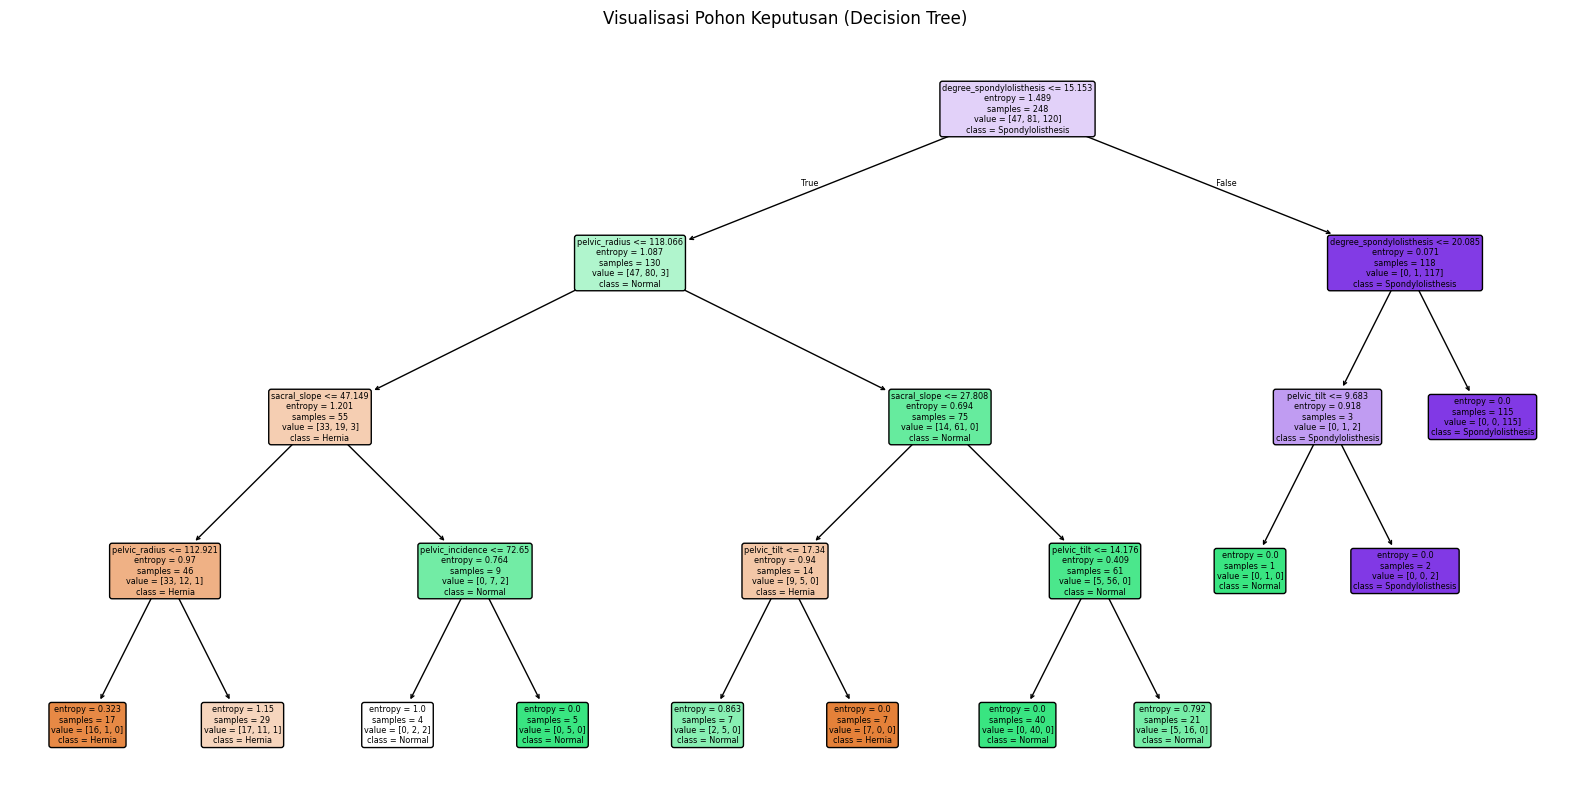

In [22]:
# Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()


Feature paling berpengaruh: degree_spondylolisthesis, sacral_slope, pelvic_tilt, pelvic_radius.

Model kuat memprediksi Spondylolisthesis, cukup baik untuk Normal, dan perlu perhatian lebih untuk Hernia.

# Evaluasi

Dari ketiga model yang dibuat dapat dilihat akurasi dari masing-masing model, yaitu:



*   Naive Bayes: memiliki akurasi 0.87

*   KNN: memiliki akurasi 0.84
*   Decision Tree: memiliki akurasi 0.76

Dari ketiga model diatas dapat disimpulkan bahwa single model Naive Bayes memiliki akurasi tertinggi yaitu 87%.


